# Portfolio Project 2 - Mushrooms

I feel like I learned a lot from our Portugese Wine dataset. However, I do not feel that I learned as much as I could have because the dataset was so constrained. The most I could do to improve the model was trim the dataset to its two most well-represented classes. To expand on that I will be dealing with another tabular dataset - Mushrooms.

This dataset looks a lot more promising than our previous one, which felt inflexible.

https://www.kaggle.com/datasets/uciml/mushroom-classification/download?datasetVersionNumber=1

## Business Justification

A company wants to make an app to help mushroom hunters identify whether a mushroom is poisonous or not. They want the model to have a high accuracy. They have put together a file containing data on the properties of poisonous/edible mushrooms to use as a dataset. They have a lot of warnings and fine print to stop them from being sued.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import SGDClassifier, LogisticRegression 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, normalize

from sklearn.covariance import EllipticEnvelope

from statsmodels.stats.outliers_influence import variance_inflation_factor

## 1. Get Dataset

In [33]:
# p e e p e
# df['class'].head().T

df = pd.read_csv('mushrooms.csv')
df.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [34]:
df['class'].T

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [35]:
chars = df['class'].tolist()
chars = ''.join(chars)
chars.count('peepee')

54

In [36]:
df.shape

(8124, 23)

### 1a. Check for Null Values

In [37]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [38]:
# display transpose of dataframe details

df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


### 1b. Encode the Data

Let's encode the data. This will convert the datatypes in our datasets into the kinds a machine learning model can use. We'll use a label encoder for this.

In [39]:
label_encoder = LabelEncoder()

In [61]:
# this isn't the best implementation of a label encoder because I can't use inverse_transform(!)

for col in df:
    df[col] = label_encoder.fit_transform(df[col])

In [41]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


#### Note on Class label

0 is edible and 1 is poisonous.

### 1c. Remove Constants

Veil-types looks a bit suspicious. Let's see how many unique values it contains.

In [42]:
print(df['veil-type'].value_counts())

0    8124
Name: veil-type, dtype: int64


As we can see, there is only one unique value in veil-type. That makes it a constant, which can interfere with a models ability to make predictions. We'll drop it here because there's nothing we can do with it. We can't split it because it's a single value, or remodel it in some way, so we'll drop it.

In [43]:
df = df.drop(['veil-type'], axis=1)

In [44]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


### 1d. Remove Duplicates

In [45]:
df = df.drop_duplicates()

## 2. Model Selection and Drafting

In [46]:
y = df['class']
x = df.drop(['class'], axis=1)
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [47]:
x.shape, y.shape

((8124, 21), (8124,))

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [49]:
x_train.shape, y_train.shape

((5686, 21), (5686,))

### 2a. Support Vector Classifier

In [50]:
# support vector machine
svc = SVC().fit(x_train, y_train)
svc.score(x_train, y_train), svc.score(x_test, y_test)
y_pred = svc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred))

Accuracy: 0.9909762100082035
Precision: 1.0
Recall: 0.9813559322033898
F1_score: 0.990590248075278


### 2b. Random Forest Classifier

In [51]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=10, random_state=100).fit(x_train, y_train)
rfc.score(x_train, y_train), rfc.score(x_test, y_test)
y_pred = rfc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0


### 2c. Random Forest Classifier with K-Fold Cross Validation

In [52]:
# let's try with cross validation
k = 30
kf = KFold(n_splits=k, random_state=None)

In [53]:
print(cross_val_score(rfc, x, y, cv = kf))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


I don't know if this is good or bad. Part of me thinks it's impossible to overfit test data, because the model isn't trained on it. 

Let's try a different model and try to get as close to 100% prediction accuracy as possible. 

Since we removed duplicate data points we know that isn't the problem. Let's try another model.

### 2d. K-Nearest Neighbour

In [54]:
knn = KNeighborsClassifier(leaf_size=30, metric='euclidean', 
                           metric_params=None, n_jobs=1,n_neighbors=9, p=2, weights='uniform')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1_score:", f1_score(y_test, y_pred))

Accuracy: 0.9991796554552912
Precision: 0.9991525423728813
Recall: 0.9991525423728813
F1_score: 0.9991525423728813


This is a very strong model. Our Random Forest Classifier is overfitting on the training set but has perfect accuracy on the test set. Let's run with our KNN model because it is still quite close to 100% accuracy, and we don't have to worry about overfitting.

## 3. Data Visualisation

Let's visualise our data and model results.

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### 3a. Confusion Matrix

A confusion matrix will help us see how our model is performing. We can create a basic one:

In [56]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[1257,    1],
       [   1, 1179]], dtype=int64)

Or a more detailed one:

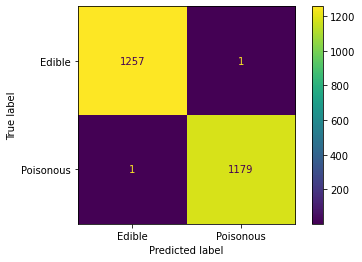

In [57]:
conf_dsp = ConfusionMatrixDisplay(conf, display_labels = ['Edible', 'Poisonous'])
conf_dsp.plot()

Only 1 false positive and 1 false negative. Not bad!

**Are false predictions necessary if we want to be sure our model can make predictions for new data points? Or is it possible to get a 100% accurate model without overfitting?** There is probably a fine line and some kind of test we can do to make sure our model is not overfitting. But that might be a bit beyond my expertise at present.

### 3b. Pie Chart

In [58]:
print(df['class'].value_counts())

0    4208
1    3916
Name: class, dtype: int64


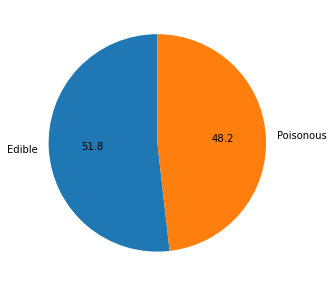

In [59]:
# visualised

plt.figure(figsize = (5,5))
plt.pie(df['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = False)
plt.show()

### 3c. Countplot

Countplots will show how different feature values relate to the classes we're predicting.

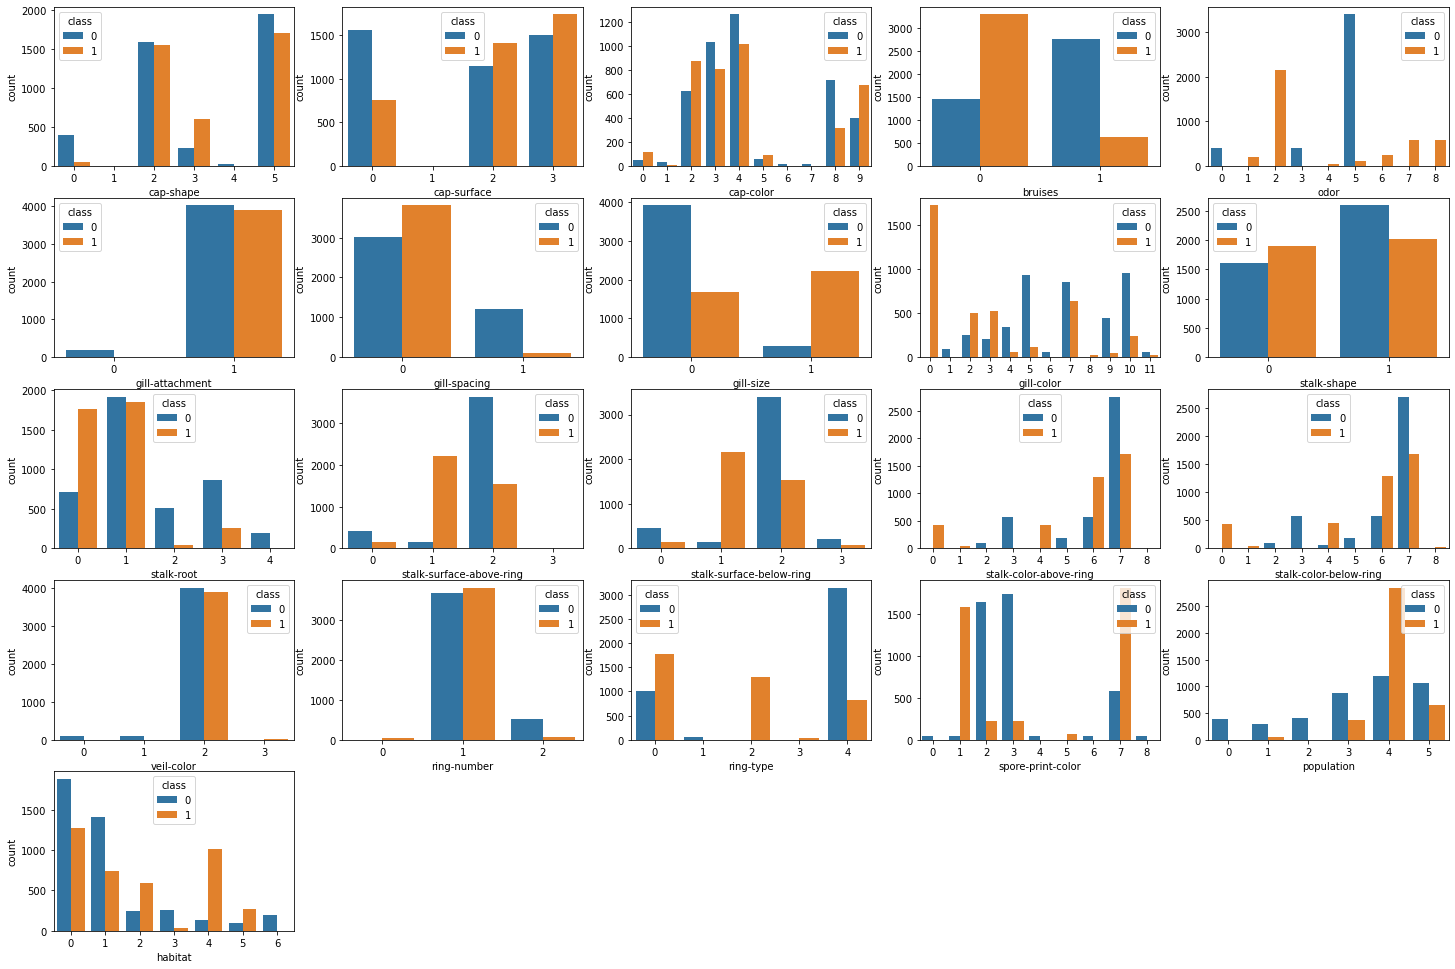

In [60]:
plt.figure(figsize=(25,17))
for i in range(1,len(df.columns)):
    plt.subplot(5,5,i)
    sns.countplot(x=df[df.columns[i]],hue=df['class'])

## 4. Conclusion

In this dataset I imported a csv file containing data on poisonous and edible mushrooms.

I checked for null values, used a Label Encoder to change feature value types from strings to integers, then removed constants and duplicate data points.

I then created several models. The first was a Support Vector Classifier, the second was a Random Forest Classifier, the third was a Random Forest Classifier using K-Fold Cross Validation, and the fourth was a K-Nearest Neighbour. 

These models yielded positive results. I was not sure if the RFCs were overfitting, even with cross-validation, so I settled on a K-Nearest Neighbour Clustering algorithm with an accuracy of over 99.9%. I'm not sure what else to do because the model turned out well with minimal changes to the data! 

I will therefore create another notebook and use it to model audio or visual data. 